# Monsoon (Sperber)

This notebook demonstrates how to use the PCDMI Monsoon (Sperber) driver.

It is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb)

The following cell reads in the choices you made during the download data step.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

This cell uses cdscan to create an xml from multiple GPCP precipitation files provided in the sample data. This single file is then read into the metrics driver. Alternatively, one could concatenate the precipitation files into a single netcdf.

In [3]:
%%bash -s "$demo_data_directory"
# Move this to demo 0
cdscan -x  $1/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr.day.GPCP-IP.BE.gn.v20200719.1998-1999.xml $1/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/*.nc

Finding common directory ...
Common directory: demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/
Scanning files ...
demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr_day_GPCP-IP_BE_gn_v20200719_19980101-19981231.nc
Setting reference time units to days since 1970-01-01 00:00:00
demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr_day_GPCP-IP_BE_gn_v20200719_19990101-19991231.nc
Setting reference time units to days since 1970-01-01 00:00:00
demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr.day.GPCP-IP.BE.gn.v20200719.1998-1999.xml written


For immediate help with using the monsoon (sperber) driver, use the `--help` flag, demonstrated here:

In [2]:
%%bash
driver_monsoon_sperber.py --help

usage: driver_monsoon_sperber.py [-h] [--parameters PARAMETERS]
                                 [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                 [--mip MIP] [--exp EXP]
                                 [--results_dir RESULTS_DIR]
                                 [--reference_data_path REFERENCE_DATA_PATH]
                                 [--modpath MODPATH] [--frequency FREQUENCY]
                                 [--realm REALM]
                                 [--reference_data_name REFERENCE_DATA_NAME]
                                 [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                                 [--modpath_lf MODPATH_LF] [--varOBS VAROBS]
                                 [--varModel VARMODEL]
                                 [--ObsUnitsAdjust OBSUNITSADJUST]
                                 [--ModUnitsAdjust MODUNITSADJUST]
                                 [--units UNITS] [--osyear OSYEAR]
                                 [--msy

## Basic Example

This metric uses daily precipitation data and computes monsoon scores over 6 preset regions, shown below.

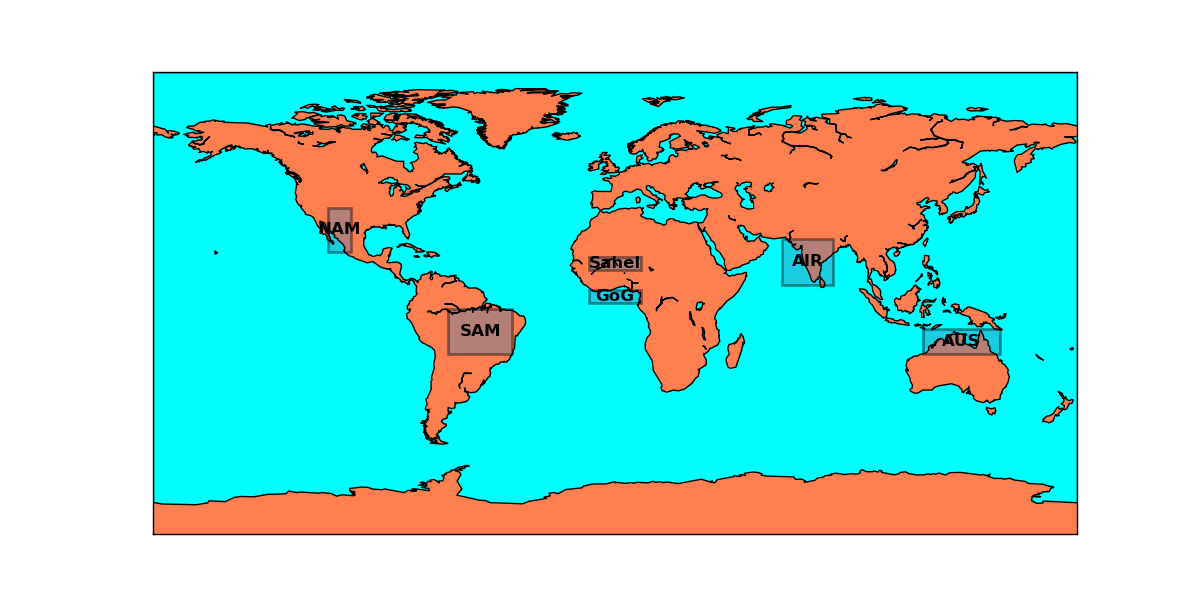

In [3]:
from IPython.display import Image

Image(filename = "../../../pcmdi_metrics/monsoon_sperber/doc/monsoon_domain_map.png")

First we demonstrate the parameter file for the basic example.

In [4]:
with open("basic_monsoon_sperber_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# MODEL VARIABLES THAT MUST BE SET
mip = 'cmip5'
exp = 'historical'
frequency = 'da'
realm = 'atm'
realization = 'r1i1p1'

# MODEL VERSIONS AND ROOT PATH
modnames = ['GISS-E2-H']
modpath = 'demo_data/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_%(model)_historical_r6i1p1_20000101-20051231.nc'
modpath_lf = 'demo_data/CMIP5_demo_data/sftlf_fx_ACCESS1-0_amip_r0i0p0.nc' # land fraction mask

varModel = 'pr'
ModUnitsAdjust = (True, 'multiply', 86400.0)  # kg m-2 s-1 to mm day-1
units = 'mm/d'

msyear = 2000
meyear = 2002

# ROOT PATH FOR OBSERVATIONS
reference_data_path = 'demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr_day_GPCP-IP_BE_gn_v20200719_1998-1999.nc'
reference_data_name = 'GPCP-IP'
reference_data_lf_path = '~/Metrics/demo_data/NCL_LandSeaMask_rewritten.nc'  # land fraction mask

varOBS = 'pr'
ObsUnitsAdjust = (True, 'multiply', 86400.0)  # kg m-2 s-1 to mm day-1

osyear = 1998
oeyear

To run the driver using only a parameter file for inputs, do the following:

In [5]:
%%bash
driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py

models: ['GISS-E2-H']
realization:  r1i1p1
demo_output/monsoon_sperber/Ex1
demo_output/monsoon_sperber/Ex1
demo_output/monsoon_sperber/Ex1
debug:  False
 -----  GISS-E2-H  ---------------------
lf_path:  demo_data/CMIP5_demo_data/sftlf_fx_ACCESS1-0_amip_r0i0p0.nc


done


CalledProcessError: Command 'b'driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py\n'' returned non-zero exit status 1.

## Output options

There are several options for output data format. Users can choose to generate metrics in netCDF format along with png graphics.

To save these results in a different folder, the `--result_dir` value is changed. Using `$1` to refer to the `demo_output_directory` variable is a trick for the Jupyter Notebook and is not needed for regular command line use.

In [ ]:
%%bash -s "$demo_output_directory"
driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py \
--nc_out --plot --results_dir $1/monsoon_sperber/Ex2

## Results

At a minimum, this driver will produce a JSON file containing the monsoon metrics in the `result_dir`. If the user requests the binary and plot outputs, those will also be present in the `result_dir`. Looking at the results from Ex2:

In [4]:
! ls {demo_output_directory + "/monsoon_sperber/Ex2"}

cmip5_ACCESS1-0_historical_historical_monsoon_sperber_2000-2002.nc
cmip5_ACCESS1-0_historical_historical_monsoon_sperber_2000-2002.png
cmip5_obs_historical_obs_monsoon_sperber_1997-1998.nc
cmip5_obs_historical_obs_monsoon_sperber_1997-1998.png
cmip5_obs_historical_obs_monsoon_sperber_1998-1999.nc
cmip5_obs_historical_obs_monsoon_sperber_1998-1999.png
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002_org_2281.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002_org_2493.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002_org_70493.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002_org_71222.json


The monsoon metrics are found in the "RESULTS" object in the JSON file. Below we extract and display these metrics.

In [5]:
import json
metrics_file = demo_output_directory + "/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2002.json"
with open(metrics_file) as f:
    results = json.load(f)["RESULTS"]
print(json.dumps(results, indent = 2))

{}


For more help interpreting these values, please consult the following paper:
 
Sperber, K. and H. Annamalai, 2014:
The use of fractional accumulated precipitation for the evaluation of the
annual cycle of monsoons. Climate Dynamics, 43:3219-3244,
doi: 10.1007/s00382-014-2099-3

If `plot = True`, the driver also outputs figures that compare the precipitation pentads between model and observations.

In [7]:
Image(filename = demo_output_directory + "/monsoon_sperber/Ex2/cmip5_ACCESS1-0_historical_historical_monsoon_sperber_2000-2002.png")

NameError: name 'Image' is not defined